# Principal component analysis: An outline

This is a simple presentation about Principal Component Analysis (PCA) in Scikit-Learn that was given by the author during the S2DS summer school in London. See www.s2ds.org.

# Introduction

Principal Component Analysis (PCA) is a mathematical technique (mainly Linear Algebra)
that sometimes can be used for:
* **Dimensionalty reduction:** Reducing the number dimensions of a data set by projecting the data onto a lower dimensional representation.

* **Data compression:** Creation of a representation of the data set, which needs fewer memory.

It is often used together with exploratory data analysis to get first insights on a data set, for example, by creating plots of two- or three-dimensional representations of the data set. 

**Example (Feature reduction):** In this example we foreshadow how PCA might be used to reduce the dimension of a *feature space*. To get the terminology straight, let us first point out what is meant by a feature space here: If you make observations of a fixed number $n$ of numerical features, for instance *length*, *height*, *width* of boxes produced by some machine (so here $n=3$), then you could model the space of all possible observations as $\mathbb{R}^3$, and this would be the feature space in this case. 

One instance where one might try to apply PCA is when the dimension $n$ of the feature space is large and many of the observations seem to be correlated. In such an case PCA might help to reduce the number of features by recombining the $n$ given features in a smaller number $k<n$ of new features, called the principal components of the original features (details below). The recombination will happen in a linear manner: the new features are certain linear combinations of the old features. In terms of Linear Algebra we do an change of basis in $\mathbb{R}^n$ (the transformation matrix of the change of basis will be given by the eigenvectors of the (sample) covariance matrix of the data set.)

To elaborate a little on this idea, let us assume we make observations on people one could describe as *nerdy*. Here a some pictures to get the right idea of the *underlying feature* nerdiness:

<img src="Nerds.png">

If we were to explain to somebody what nerdiness is, we might describe it to him by means of a table of characteristic people we would consider nerdy, in which we list observations of certain numerical features, which could include the following:
* A numerical score describing weirdness of clothings,
* A numerical score describing whether the person wears glasses and how the glasses look,
* A frequency describing the number of strange remarks by this person per hour,
* A numerical score describing how strange the person's body language appears,
* A frequency describing the number of female brush-off phrases this person receives per month,
* etc.

Now the idea behind PCA, as will described in more detail in the mathematical derivation below, is that some of these observations might be correlated and perhaps redundant. For example, the weirdness of the clothes a person wears combined with unattractive glasses and a couple of even more unattractive strange remarks combined with a weird body language might result in a high number of female brush-off phrases. So in the end one might hope to reduce the number of features one needs. PCA is a technique, which can sometimes (but not always) be used to achieve something in this direction, and which might be able to find new features, underlying features, which govern the data set. In the case of PCA the new features, as remarked above, will be linear combinations of the old. So we might find in our example the following new underlying feature Neardiness that describes our data set well:

$$\mathbf{Nerdiness} = 0.8\times\mathbf{(Clothings)} + 0.2\times\mathbf{(Glasses)} + 0.7\times\mathbf{(Number\; of\; strange\; remarks/hr)} + 7.1\times \mathbf{(Strange\; body\; language)}+12.333\times\mathbf{(Number\; of\; received\; female\; brush-off\; phrase/month)}+\cdots$$ 

In this way we would be able to reduce the dimension $n\geq 8$ (equal to eight or greater-equal depending on whether and how one extends the above list of features) to a one-dimensional describtion. 

The reader has certainly noticed that this example is not based on a real dataset and that we have not really applied the technique of PCA to it to discover that most of it can be described adequately by a new one-dimensional describtion but that is merely a a nice, hopefully memorable, outline of the basic ideas by means of a more or less realistic use case. Nevertheless the basic ideas as described are what happens in more real life examples, we will look at below.

**Example (Data compression):** As explained above PCA might be used to reduce the number of features used to describe a data set by linearly recombining the old features. If data points in the data set happen to be $(600\times 800)$ images, like the ones below, or equivalently 480000-dimensional vectors from $\mathbb{R}^{480000}$, then by recombinging them linearly we might end up by a number $k\leq n$ of new images as the one shown in the following row:

<img src="FrankensteinFaces.png">

<img src="FrankensteinApproximation.png">

(Images by Christian Thurau)

These pictures no longer describe individual people but are some strange, hard to interpret amplitudes of these, which seem to come straight out of the movie House on Haunting Hill. This is a quite common phenomena with PCA: it produces hard to interpret "Frankenstein features": features that are mixed together from pieces chopped off from the original data, as the pictures might testify.

Nevertheless, using these new basis vectors we can replace an input image $V$ from our original data set to replace it by a lower dimensional representation $V_{\mathrm{approx}}$. Here we can clearly see how the new feature images are used to combine them into some image that more or less matches the original image.

# Mathematical background I: Covariance and all that...

**Definition (Covariance):** Let $X,Y\colon\Omega\rightarrow\mathbb{R}$ be integrable random variables whose product $XY$ is also integrable. The **covariance** of $X$ and $Y$ is defined as $$\mathrm{Cov}(X,Y):=\mathbf{E}[(X-\mu_X)(Y-\mu_Y)]$$
If $X=Y$, $\mathrm{Cov}(X,Y)=\mathrm{Var}(X)=\mathbf{E}[(X-\mu_X)^2]$ is the expected quadratic deviation of $X$ from its mean $\mu_X$.

**Definition (Covariance matrix):** Let $X=(X_1,\ldots,X_n)\colon\Omega\rightarrow\mathbb{R}^n$ be a random vector. Its **covariance matrix** is defined as $$\mathrm{Cov}(X):=(\mathrm{Cov}(X_i,X_j))_{1\leq i,j\leq n}=\begin{pmatrix}
\mathrm{Var}(X_1)     & \mathrm{Cov}(X_1,X_2) & \cdots & \mathrm{Cov}(X_1,X_n) \\
\mathrm{Cov}(X_2,X_1) & \mathrm{Var}(X_2)     & \cdots & \mathrm{Cov}(X_2,X_n) \\
\vdots & \vdots & \ddots & \vdots \\
\mathrm{Cov}(X_n,X_1) & \mathrm{Cov}(X_n,X_2)     & \cdots & \mathrm{Var}(X_n) \\
\end{pmatrix}$$

**Definition (Pearson correlation coefficient):** Let $X,Y\colon\Omega\rightarrow\mathbb{R}$ be integrable random variables whose product $XY$ is also integrable. The **Pearson correlation coefficient** of $X$ and $Y$ is defined as $$\rho(X,Y)=\frac{\mathrm{Cor}(X,Y)}{\mathrm{SD}(X)\,\mathrm{SD}(Y)}\in [-1,1]$$

<div style="background-color: #C8F6C8; border:1px solid black; padding: 10px;">
<p>
**Question:** Where does it all come from and what does it mean (geometrically)?
</p>

<p>
**Possible answer:** Linear regression.
</p>

<p>
**Recap:** Let $(x_i,y_i)\in\mathbb{R}^2$ with $i\in [1:n]$ be pairs of numerical observations/measurements.
Write $\mathbb{x}=(x_1,\ldots,x_n)$ and $\mathbb{y}=(y_1,\ldots,y_n)$. Also let $\bar{\mathbb{x}}=(\bar{x},\ldots,\bar{x})$ and $\bar{\mathbb{y}}=(\bar{y},\ldots,\bar{y})$ the vectors whose $n$ components are all identical to the corresponding mean.
</p>

<p>
The **question** is whether there exists a linear funcion $$f\colon\mathbb{R}\rightarrow\mathbb{R}\quad,\quad f(x)=y=m\,x+b$$
with $f(x_i)=y_i$ for $i\in [1:n]$ or at least with **minimal least square error** $$\mathrm{LSE}(m,b)=\sum_{i=1}^n (y_i - f(x_i))^2\rightarrow\min$$

Using calculus, one can show (assuming that $\mathbb{x}\neq\bar{\mathbb{x}})$ that $\mathrm{LSE}$ is minimal at the point $(\hat m,\hat b)$ given by the so-called **least square estimators:**
$$\hat m =\frac{\displaystyle\sum_{i=1}^n (x_i-\bar x)(y_i-\bar y)}{\displaystyle\sum_{i=1}^n (x_i-\bar x)^2}=\frac{\langle\mathbb{x}-\bar{\mathbb{x}}, \mathbb{y}-\bar{\mathbb{y}}\rangle}{\langle\mathbb{x}-\bar{\mathbb{x}}, \mathbb{x}-\bar{\mathbb{x}}\rangle}$$
and 
$$\hat{b}=\bar{\mathbb{y}}-\hat m\,\bar{\mathbb{x}}$$
</p>
</div>

The slope coefficient $\hat{m}$ can also be written as $$\hat{m}= \mathrm{Cor}(\mathbb{x},\mathbb{y})\,\frac{\mathrm{Sd}(\mathbb{y})}{\mathrm{Sd}(\mathbb{x})}$$ with the following definition of sample covariance $\mathrm{Cor}(\mathbb{x},\mathbb{y})$ and sample standard deviation $\mathrm{Sd}(\mathbb{x})$:

**Definition (Sample covariance and deviation):** Define the **sample standard deviation** by

$$\mathrm{Sd}(\mathbb{x})=\sqrt{\frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2}$$

and the **sample covariance** by

$$\mathrm{Cor}(\mathbb{x},\mathbb{y})=\frac{1}{n-1}\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})$$

(Here one divides by $(n-1)$ instead of $n$ in order to get unbiased estimators for the corresponding population values.)

**Geometric interpretation:** Up to the scale factor $\mathrm{Sd}(\mathbb{y})\,\mathrm{Sd}(\mathbb{x})^{-1}$ (think of unit standard deviations) the correlation $\mathrm{Cor}(\mathbb{x},\mathbb{y})$ is the slope of the least square regression line 
for the regression problem $\mathbb{y}\sim\mathbb{x}$.

* Correlations equal to $\pm 1$ correspond to data points lying exactly on a line.
* Values "close" to $1$ are interpreted as "large $x$-values result in large $y$-values".
* Values "close" to $-1$ are interpreted as "large $x$-values result in small $y$-values".
* "Close" depends on application and subject standards.

<img src="CorrelationExamples.png">
(Source: http://en.wikipedia.org/wiki/Correlation)

**Remark:** The picture makes reference to Cartesian coordinates (not shown in the image). Using polar coordinates one could on the other hand describes one of the circular data point clouds shown in the lower columns by a linear point cloud in cartesion coordinates, so one could try to argue the covariance would be $\pm 1$ and not $0$ in this case. This remark is related to a question from the audience during the talk and included here for completeness.

*Correlation vs. Causation:* High nationwide chocolate consum leads to more Nobel prize winners in that nation, etc.

Read more at: http://en.wikipedia.org/wiki/Correlation_does_not_imply_causation

<img src="CorrelationCausation.png">
(Source: http://xkcd.com/552/)


$\mathrm{Cov}(X,Y) = 0$	means "Uncorrelated" while $\mathrm{Cov}(X,Y) \neq 0$ means "Correlated"/"dependent".

As a side remark: If $Y=mX+b$ then $Cov(X,Y)=Cov(X,X)=m\,\mathrm{Var}(X)$. 

# Mathematical background II: What are principal components?

**Notational conventions:** "Vector" means $(n\times 1)$-matrix: $$x=\begin{pmatrix} x_1 \\ \vdots\\ x_n\end{pmatrix}$$
Hence $x^T=\begin{pmatrix} x_1 & \cdots & x_n\end{pmatrix}$ is a $(1\times n)$-matrix.

Let $X:=(X_1,\ldots,X_n)$ be r.v. with mean $\mu$ and covariance matrix $Cov(X)$.

<div style="background-color: #FF9999; border:1px solid black; padding: 10px;"> **Definition:** Let $\lambda_1\geq\cdots\geq\lambda_n$ be the eigenvalues of $\mathrm{Cov}$ and let $R\in O(n)$ be a orthonormal matrix, which diagonalizes $\mathrm{Cov}(X)$: 

$$\mathrm{Cov}(X)=R\,\mathrm{diag}(\lambda_1,\ldots,\lambda_n)\,R^T$$

To put it differently: There exists an orthonormal basis $(b_1,\ldots,b_n)$ with

$$\mathrm{Cov}(X)=\sum_{i=1}^n\lambda_i\,b_i^T\,b_i$$

The **principal components** of $X$ are the components of $Y:=(Y_1,\ldots,Y_n):=R^TX$.
</div>


**Question:** Is $R$ with the above property unique?

<div style="background-color: #FF9999; border:1px solid black; padding: 10px;">
**Lemma:** One has $\lambda_i = \mathrm{Var}(Y_i)$ for the $i$-th eigenvalue of $\mathrm{Cov}(X)$ for each $i\in [1:n]$.
</div>

**Proof:** One has $$\mathrm{Cov}(Y)=\mathrm{Cov}(R^TX)=R^T\,\mathrm{Cov}(X) R=\mathrm{diag}(\lambda_1,\ldots,\lambda_n)$$ Thus the covariance matrix of $Y$ is a diagonal. Since the diagonal entries are the variances of of the components of $Y$, we are done.

<div style="border:1px solid black; padding: 10px;">

As a consequence we obtain the following interpretation of the lines (or coordinate axes, if you prefer) $\mathbb{R}\cdot b_i$:

<center>** The $i$-th eigenvector spans the direction of $i$-th largest variation. **</center>

Picture for this:
<img src="pca.png">

</div>

<div style="background-color: #FF9999; border:1px solid black; padding: 10px;">
**Lemma:** The principal components are pairwise uncorrelated: $\mathrm{Cor}(Y_i,Y_j)=0$.
</div>

**Proof:** By definition $Y=R^TX$. Since $R^T$ has $b_1^T,\ldots,b_n^T$ as its columns, we find
$Y_i=b_i^TX=b_i\bullet X$. Using http://en.wikipedia.org/wiki/Covariance_matrix#Properties, (7) we find thus:
$$\mathrm{Cor}(Y_i,Y_j)=\mathrm{Cov}(b_i^TX,b_j^TX)=b_i^T\,\mathrm{Cov}(X)\,b_j=\lambda_j\,b_i^Tb_j=0$$
since $b_i$ and $b_j$ are orthogonal.

**Recall:** The **trace** of a matrix $A\in\mathbb{R}^{n\times n}$ is defined as $\mathrm{tr}(A)=\sum_{i=1}^n a_{ii}$. It has the important property $\mathrm{tr}(AB)=\mathrm{tr}(BA)$ and hence is *conjugation invariant*:

$$\mathrm{tr}(SAS^{-1})=\mathrm{tr}(A)$$

<div style="background-color: #FF9999; border:1px solid black; padding: 10px;">
**Corollary:** One has $$\sum_{i=1}^n\mathrm{Var}(X_i) = \sum_{i=1}^n\mathrm{Var}(Y_i)$$
</div>

**Usual interpretation:** The $i$-th principal component $Y_i$ accounts for a proportion of $$\frac{\lambda_i}{\displaystyle\sum_{j=1}^n\lambda_j}$$ of the total variation of the original data.

**Relation of PCA to the SVD:** The data matrix $X$ possess a singular value decomposition $X=USV^T$. The columns
    of $V$ are the same as the eigenvectors of $\mathrm{Cov}(X)$. Scikit Learn's implementation of PCA uses scipy's SVD implementation.

In [10]:
# Example for an SVD computation:
import numpy as np

matrix = np.matrix([[0.3, 0.2],
                    [0.2, 1.0]])

U, Sigma, V = np.linalg.svd(matrix, full_matrices=False)
S = np.diag(Sigma)
U * np.diag(Sigma) * V.T

matrix([[ 0.3,  0.2],
        [ 0.2,  1. ]])

In [8]:
from scipy import linalg
U, S, V = linalg.svd(matrix, full_matrices=False)
U, S, V

(array([[ 0.25666794,  0.96649965],
        [ 0.96649965, -0.25666794]]),
 array([ 1.05311289,  0.24688711]),
 array([[ 0.25666794,  0.96649965],
        [ 0.96649965, -0.25666794]]))

# General settings for the examples

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import *
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

# Doing it with Scikit-Learn

#### A two-dimensional numerical example

**Goal:** Let us create a data matrix $X$ with covariance matrix
$$\mathrm{Cov}(X) = 
\begin{pmatrix}
0.3 & 0.2 \\
0.2 & 1.0 \\
\end{pmatrix}
$$
and then
* plot the data
* compute the eigenvalues and eigenvectors (= principal components) of this covariance matrix
* rotate the data to the coordinate system given by the principal components
* plot the rotated data

###### Creating the data matrix and a plot

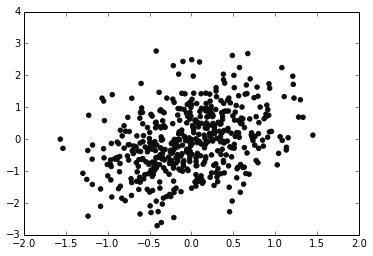

In [27]:
# For reproducibility of the results, set the seed:
np.random.seed(0)

mean = np.array([0, 0])
cov = np.array([[0.3, 0.2],
                [0.2, 1.0]])

# Draw 500 samples from a multivariate normal distribution with mean `mean` and covariance matrix `covariance`:
data = np.random.multivariate_normal(mean, cov, 500)
# Draw a scatter plot of the data:
plt.scatter(data[:,0], data[:,1], color = '.05')
plt.show()

##### Computing the eigenvalues and an ONB eigenvectors

In [28]:
# Compute the eigenvalues and eigenvectors of the covariance:
eig_val, eig_vec = np.linalg.eig(cov)
print("Eigenvalues:" + str(eig_val))
print("Eigenvectors:" + str(eig_vec[0]) + " and " + str(eig_vec[1]))

Eigenvalues:[ 0.24688711  1.05311289]
Eigenvectors:[-0.96649965 -0.25666794] and [ 0.25666794 -0.96649965]


Thus $\lambda_1=1.05311289$ and $\lambda_2=0.24688711$ if we want to order the eigenvalues decreasingly. Correspondingly, we pick our ONB $(b_1, b_2)$ of eigenvectors as follows:

In [29]:
b1 = eig_vec[1]
b2 = eig_vec[0]
# This prints the basis vectors and confirms that the they have unit length:
b1, b2, np.linalg.norm(b1), np.linalg.norm(b2)

(array([ 0.25666794, -0.96649965]),
 array([-0.96649965, -0.25666794]),
 1.0,
 1.0)

The columns of $V$, as computed from the SVD of the data matrix, look slightly different though:

In [30]:
from scipy import linalg
U, S, V = linalg.svd(data, full_matrices=False)
V

array([[ 0.25107673,  0.96796719],
       [ 0.96796719, -0.25107673]])

Think of it as follows: If $(x,y)$ is a vector $(-y,x)$ and $(y,-x)$ are both perpendicular to it.  Also $(-x,-y)$ lies in the same line as $(x,y)$ to which $(x,-y)$ is perpendicular. The results are the same up to a movement of the plane (reflection + rotation).

###### Usings Scikit-Learn's PCA class

Let's use the PCA implementation from Scikit Learn to perform a simple PCA on the above data matrix.
The method `transform` from the PCA class will allow us to rotate the data to the new coordinate system,
once it has been fitted. The documentation for this function reads as follows:

In [31]:
from sklearn.decomposition import PCA
print(PCA.transform.__doc__)

Apply the dimensionality reduction on X.

        X is projected on the first principal components previous extracted
        from a training set.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            New data, where n_samples is the number of samples
            and n_features is the number of features.

        Returns
        -------
        X_new : array-like, shape (n_samples, n_components)

        


The `components_` member variable of the PCA object contains the `n_components` first principal components:

In [32]:
# Perform PC-Transformation:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)
print(pca.components_)

[[ 0.24996447  0.96825501]
 [ 0.96825501 -0.24996447]]


Again this result slightly differs from the first `n_components` first columns of $V$ due to rounding erros: internally, the `fit` method first computes the mean of the data matrix and centers it accordingly:

In [33]:
np.mean(data, axis=0)

array([-0.0292938 , -0.06162479])

Although all data points a sampled from a distribution with zero mean, the sample mean is non-zero. This yields to the slight numerical differences in the results.

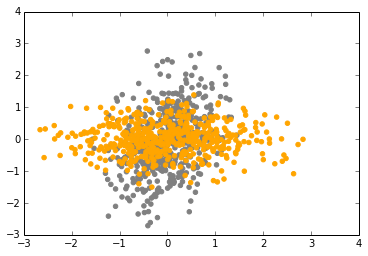

In [41]:
# Perform PC-Transformation:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)
data_transformed = pca.transform(data)

# Draw a scatter plot of the input data in light gray:
plt.scatter(data[:,0], data[:,1], color = '.5')

# Draw a scatter plot of the transformed data in orange:
plt.scatter(data_transformed[:,0], data_transformed[:, 1], color = 'orange')
# plt.scatter(data_transformed[:,0], 0 * data_transformed[:,0], color = 'red', alpha = 0.1)
# The choosen eigenvectors 'nearly' give the standard coordinate system:
# plt.scatter(eig_vec[:,0], eig_vec[:,1], color = 'red')
plt.show()

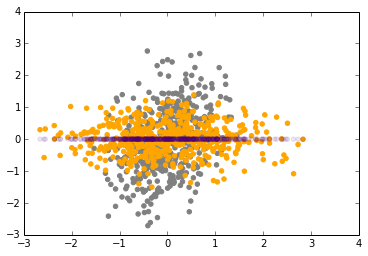

In [46]:
# Perform PC-Transformation:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)
data_transformed = pca.transform(data)

# Draw a scatter plot of the input data in light gray:
plt.scatter(data[:,0], data[:,1], color = '.5')

# Draw a scatter plot of the transformed data in orange:
plt.scatter(data_transformed[:,0], data_transformed[:, 1], color = 'orange')
# Keep only the first principal component:
n_components=1
# Project the transformed data onto the first principal component 
# (add alpha chanel in order to distinguish the projected data points):
plt.scatter(data_transformed[:,0], 0 * data_transformed[:,0], color = 'indigo', alpha = 0.1)
# The choosen eigenvectors 'nearly' give the standard coordinate system:
# plt.scatter(eig_vec[:,0], eig_vec[:,1], color = 'red')
plt.show()

**Note:** The new data (in orange) set is not only rotated but also reflected, that is the transformation is not entirely in $SO(2)$.
    This seems to be due to the implementation.

In [20]:
pca.explained_variance_ratio_

array([ 0.80175011,  0.19824989])

In [21]:
total_variance = eig_val[0] + eig_val[1]
eig_val[1] / total_variance, eig_val[0] / total_variance

(0.81008683647302104, 0.18991316352697885)

# Example: Handwritten Digits

**Aim:** Apply PC-decomposition to do some exploratory data analysis. More concretely, we look for clusters in a set of handwritten digits.

Scikit-Learn comes with a number of data sets. Here we take a look at the digits data set. This data set consists of images of handwritten digits, each represent by $(8\times 8)$ matrix of greyscale values, or equivalently a 64-dimensional vector. In addition, there are labels for the images given the actual digit. The data set is neatly structured in form of a dictionary:

In [83]:
from sklearn.datasets import load_digits
digits = load_digits()
# The images are given by `digits.data' and the corresponding labels are given in `digits.target`:
X_digits, y_digits = digits.data, digits.target
print(digits.keys())

dict_keys(['target_names', 'DESCR', 'target', 'data', 'images'])


There is a description string `DESCR`:

In [10]:
print(digits.DESCR)

 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is 

Let us plot a (4x5)-matrix of images of handwritten digits labeled with the predicted value.

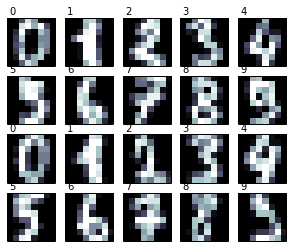

In [85]:
n_row, n_col = 4, 5

def print_digits(images, y, max_n=10):
    fig = plt.figure(figsize=(n_col, n_row))
    i=0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest')
        # Label the image with the target value:
        p.text(0, -1, str(y[i]))
        i = i + 1

print_digits(digits.images, digits.target, max_n=20)

The following prints the first digit as an array and gives its shape, confirming the above description:

In [67]:
print(X_digits[0])
X_digits[0].shape

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


(64,)

Next we perform the PC-decomposition on the digits data set, keeping 10 components:

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_digits)
for i, explained_variance_ratio in enumerate(pca.explained_variance_ratio_):
    print("Variance explained by the " + str(i + 1) + "-th principal component:\t" + str(explained_variance_ratio))

Variance explained by the 1-th principal component:	0.148905935841
Variance explained by the 2-th principal component:	0.136187712396
Variance explained by the 3-th principal component:	0.11794593764
Variance explained by the 4-th principal component:	0.0840997942101
Variance explained by the 5-th principal component:	0.0578241466401
Variance explained by the 6-th principal component:	0.0491691031712
Variance explained by the 7-th principal component:	0.0431598701083
Variance explained by the 8-th principal component:	0.0366137257708
Variance explained by the 9-th principal component:	0.0335324809797
Variance explained by the 10-th principal component:	0.030788062089


Judging from this one could try to argue that only the first three principal components account
for must of the variance. We use the first two to produce a two-dimensional scatterplot of the data:

((1797, 10), (1797, 64))

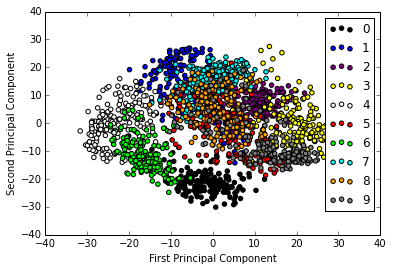

In [93]:
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits == i]
        py = X_pca[:, 1][y_digits == i]
        plt.scatter(px, py, c=colors[i])
        plt.legend(digits.target_names)
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        
n_components=2
plot_pca_scatter()
X_pca.shape, X_digits.shape

From this scatterplot we can clearly see some clusters, some more and some less separated from the others. The clusters overlap where one might exp

Finally, let us have a brief look at the principal components themselves:

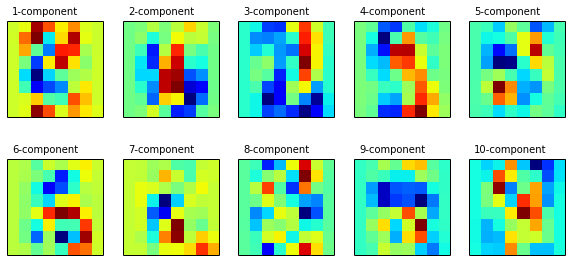

In [81]:
def print_pca_components(images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        if i <= n_col * n_row:
            plt.subplot(n_row, n_col, i + 1)
            plt.imshow(comp.reshape((8, 8)), interpolation='nearest')
            plt.text(0, -1, str(i + 1) + '-component')
            plt.xticks(())
            plt.yticks(())
        else:
            break
        
print_pca_components(pca.components_, 5, 2)

As we can see the components themselves are hard to interpet and do not correspond to digits in an obvious manner.